In [1]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


In [2]:
# create fROI, extract FIR timeseries, write to dataframe
#!. /home/despoB/kaihwang/bin/TDSigEI/make_indiv_fROI.sh
#!. /home/despoB/kaihwang/bin/TDSigEI/extract_FIR_ts.sh
%run /home/despoB/kaihwang/bin/TDSigEI/ROIs/dataframe_FIR.py

In [3]:
%cd /home/despoB/kaihwang/bin/TDSigEI
#load dataframe, calculate mean and SEM
FIR_df = pd.read_csv('Data/FIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).mean().reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).sem().reset_index()

/home/despoB/kaihwang/bin/TDSigEI


In [4]:
FIR_df['Category'] = 'Faces'
FIR_df.loc[FIR_df['Condition'] == 'HF','Category'] = 'Buildings'
FIR_df.loc[FIR_df['Condition'] == 'Hp','Category'] = 'Buildings'
#FIR_df[FIR_df['Condition'] == 'Hp']['Category'] ='Buildings'
#FIR_df[FIR_df['Condition'] == 'Ho']['Category'] ='Buildings'

FIR_df['Task'] = '0Back'
FIR_df.loc[FIR_df['Condition'] == 'HF','Task'] ='1Back'
FIR_df.loc[FIR_df['Condition'] == 'FH','Task'] ='1Back'
FIR_df.head()

,Unnamed: 0,Beta,ROI,Subj,Condition,Volume,Category,Task
0,0,0.076384,FFA,512,FH,1,Faces,1Back
1,1,-0.069176,FFA,512,FH,2,Faces,1Back
2,2,-0.062907,FFA,512,FH,3,Faces,1Back
3,3,0.100623,FFA,512,FH,4,Faces,1Back
4,4,0.083440,FFA,512,FH,5,Faces,1Back


In [5]:
subj_FIR_df = FIR_df.groupby(['ROI','Category','Subj','Task', 'Volume']).mean().reset_index()
subj_FIR_df2 = FIR_df.groupby(['ROI','Task','Subj']).mean().reset_index()
subj_FIR_df.head()
subj_FIR_df2.to_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/FIRbeta.csv')

# Plot group average with mean and shaded SEM

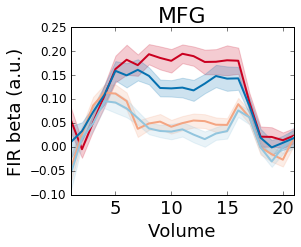

In [10]:
#conditions
plt.rc('xtick', labelsize=18)  
plt.rc('ytick', labelsize=12)
ROIs = ['MFG'] # 'PPA', 'V1', 'MFG', 'FEF'
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,22)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)
plt.figure(1)
plt.figure(figsize=(4,3))
#plt.suptitle('FIR Estimates', fontsize=14, fontweight='bold')
for r, roi in enumerate(ROIs):
    
    ax=plt.subplot(1,1,1)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        error = np.array(sem_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        plt.plot(x, y, color = cmap.hex_colors[i], linewidth=2  )
        ax.set_title(roi, fontsize=22)   
        plt.fill_between(x, y-1*error, y+1*error, alpha=0.2, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i], label=c)
        #if roi == 'V1':
        #    plt.ylim(-0.2, 2)
        #else:
        #    plt.ylim(-0.2, 0.5)
        plt.xlim(1, 21)
        plt.xlabel('Volume', fontsize=18)
        plt.ylabel('FIR beta (a.u.)', fontsize=18)
        
#plt.legend(Labels, fontsize=12, loc='outside', bbox_to_anchor=(1, 1))
#plt.show()
#plt.savefig('/home/despoB/kaihwang/bin/TDSigEI/FIR_estimates.pdf')


# plot indiv FIR for inspection

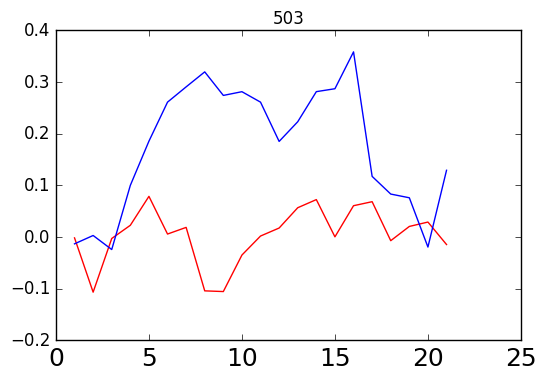

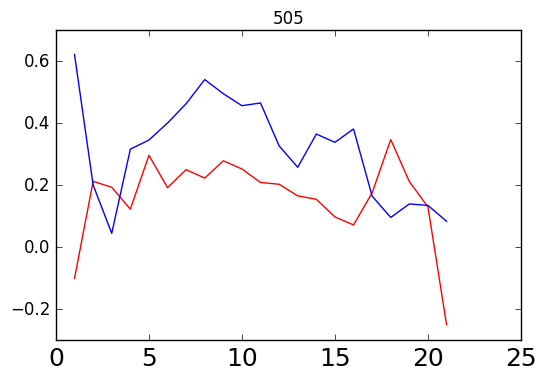

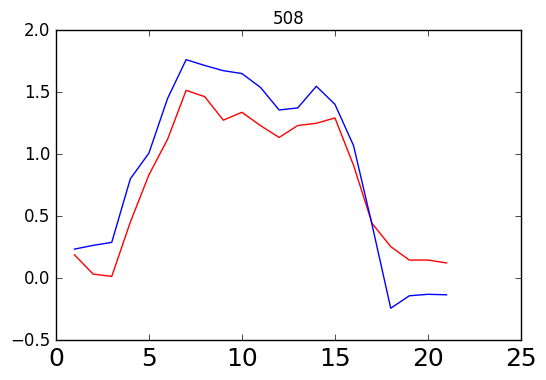

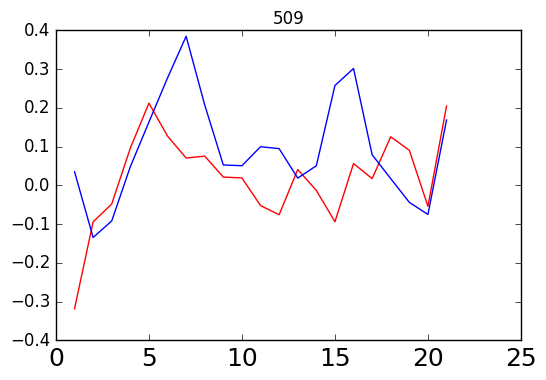

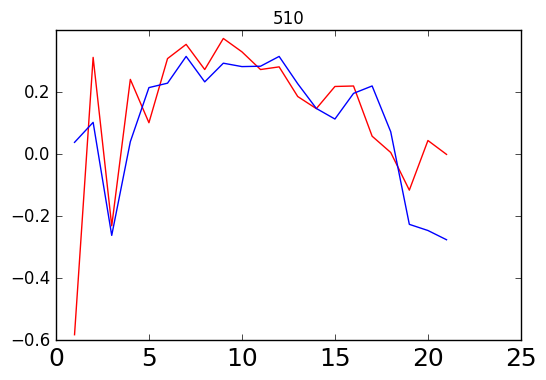

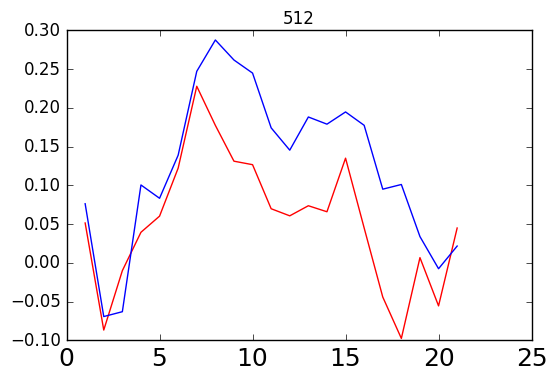

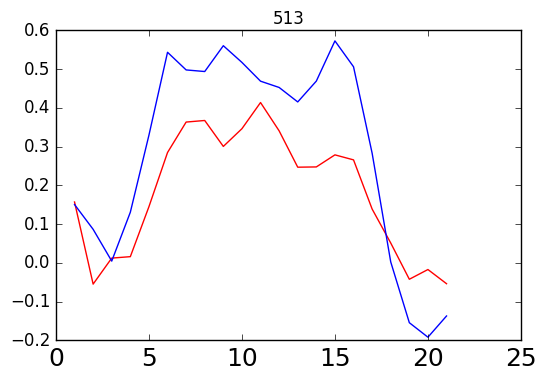

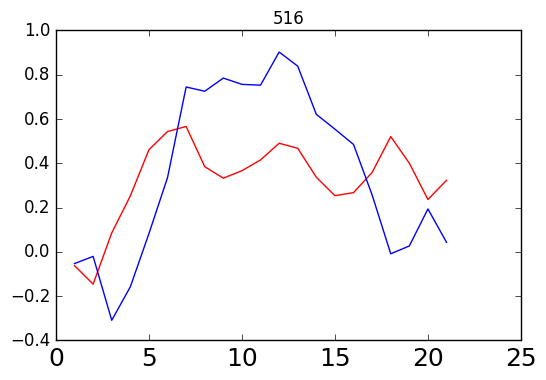

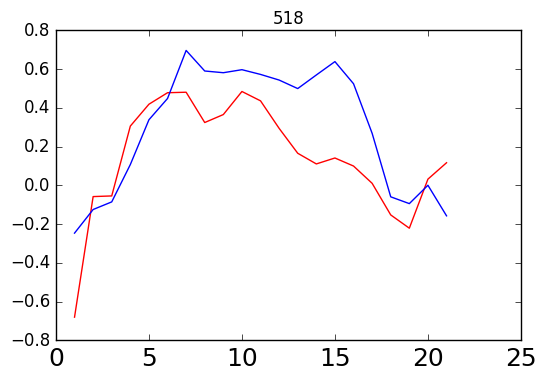

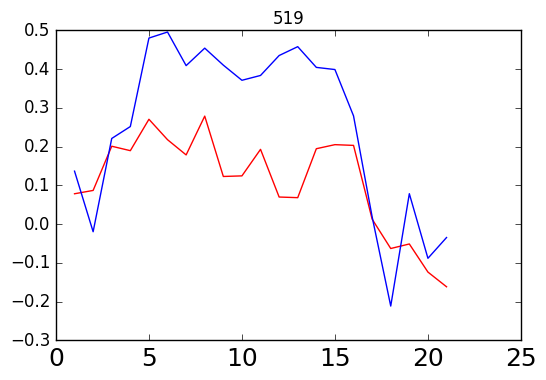

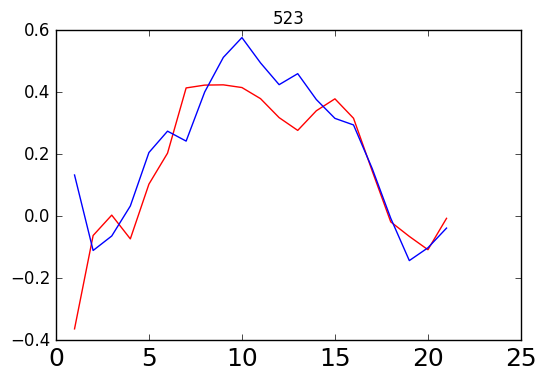

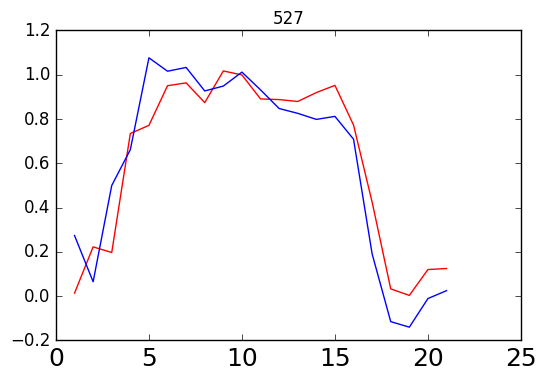

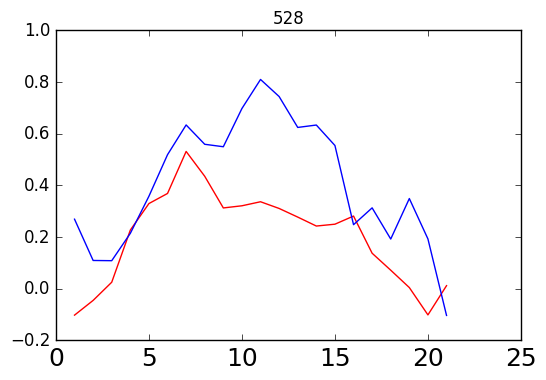

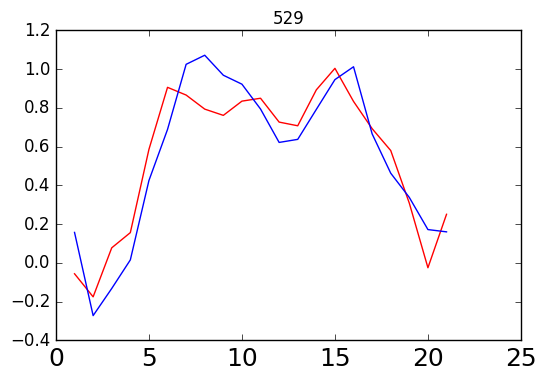

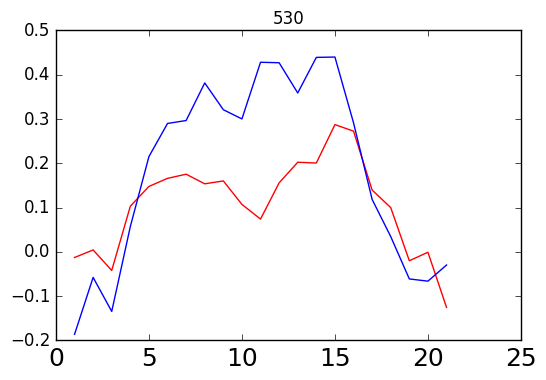

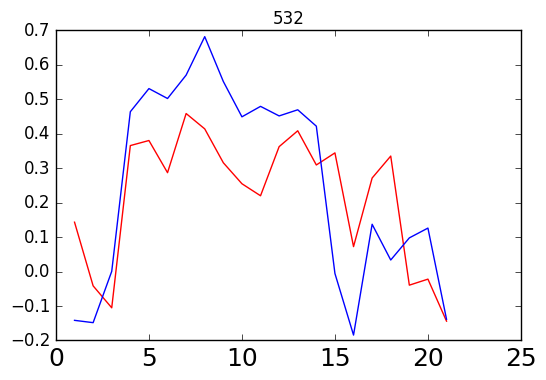

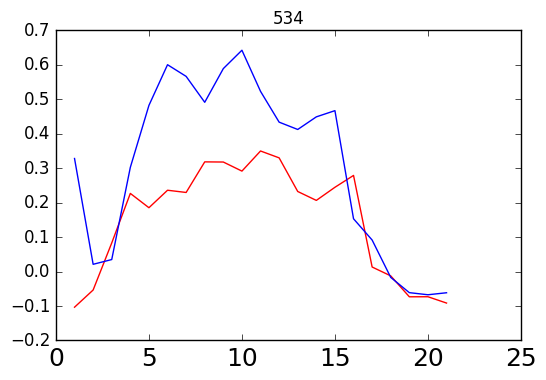

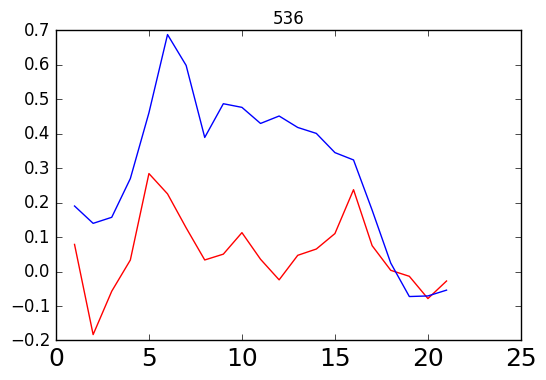

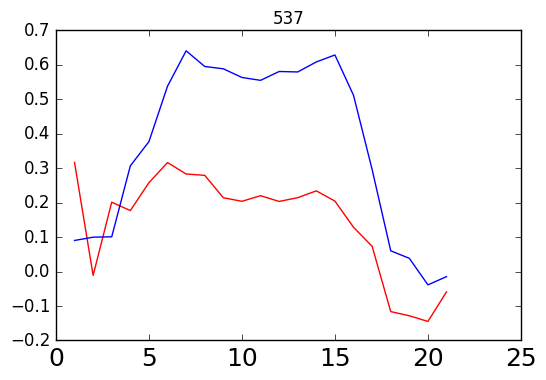

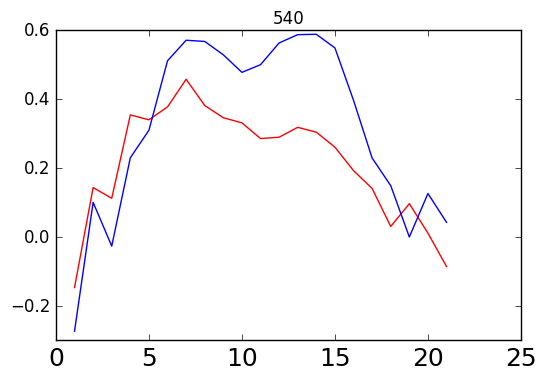

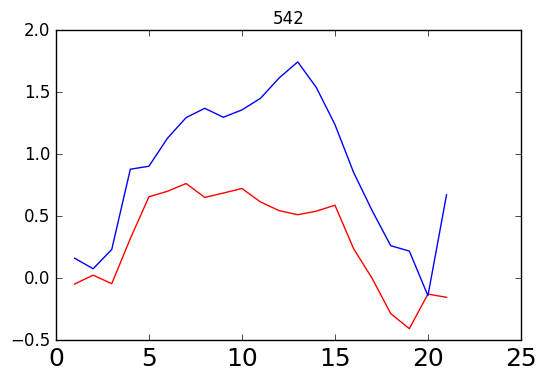

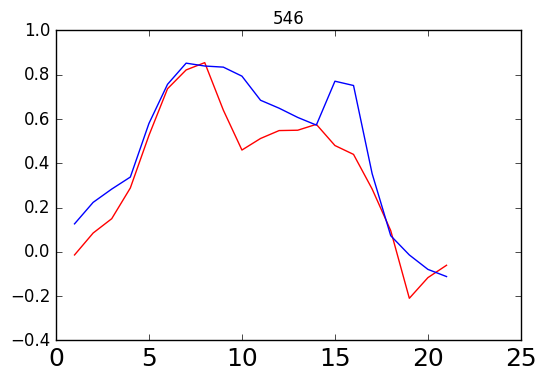

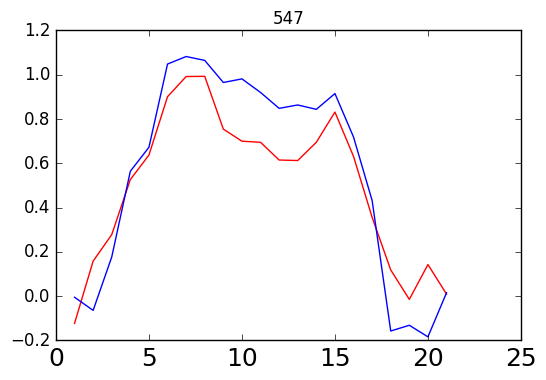

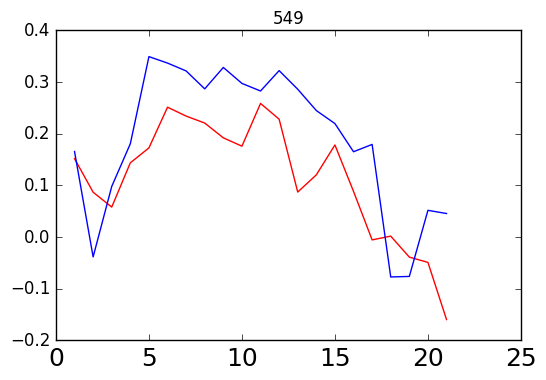

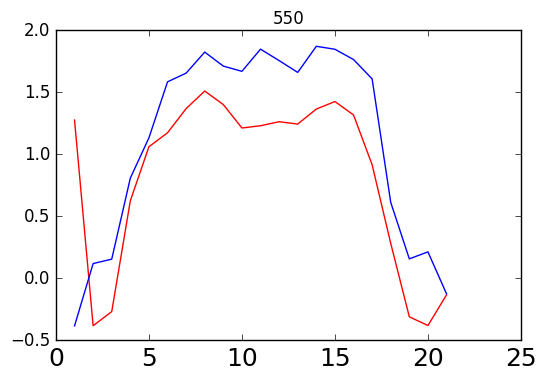

In [34]:
for i, sub in enumerate(np.unique(FIR_df['Subj'])):
    if not isnan(sub):
        plt.figure(i)
        y1 = FIR_df[(FIR_df['Condition']=='HF')& (FIR_df['Subj']==sub)& (FIR_df['ROI']=='FFA')]['Beta'].values
        y2 = FIR_df[(FIR_df['Condition']=='FH')& (FIR_df['Subj']==sub)& (FIR_df['ROI']=='FFA')]['Beta'].values
        if len(x) == len(y):
            plt.plot(x, y1, 'red')
            plt.plot(x, y2, 'blue')
            plt.title(sub) 

## save output

In [46]:
Ds=FIR_df.groupby(['Condition', 'Subj','ROI']).mean().reset_index()
Ds[Ds['ROI'] =='FFA'].to_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/FFA_FIRbeta.csv')
Ds[Ds['ROI'] =='PPA'].to_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/PPA_FIRbeta.csv')

In [4]:
%cd /home/despoB/kaihwang/bin/TDSigEI
#load dataframe, calculate mean and SEM
FIR_df = pd.read_csv('Data/TRSEFIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).mean().reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).sem().reset_index()

/home/despoB/kaihwang/bin/TDSigEI
